ChEn-3170: Computational Methods in Chemical Engineering Spring 2022 UMass Lowell; Prof. V. F. de Almeida **24Apr22**

# Laboratory Work 08 (24Apr22)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |
    

### <font color="red">Guidance:</font>

+  <font color="red"> 
    Save your work frequently to a file locally to your computer.
   </font>
+  <font color="red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<font color="red">, to verify your notebook runs correctly.
   </font>
+  <font color="red">
    Save your file again.
   </font>
+  <font color="red">
    Upload the notebook file in the Blackboard submission portal as: 
   </font> 
   
   **lastname-firstname-labwork-xx.ipynb**
   
   NB: Please note lowercase.

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (50 pts)](#a1) Exothermic CSTR.
 - [1.1)](#a11)(5 pts) Compute SS.
 - [1.2)](#a12)(5 pts) Steady state stability.
 - [1.3)](#a13)(5 pts) Principal relaxation times.
 - [1.4)](#a14)(5 pts) Evolve SS.
 - [1.5)](#a15)(5 pts) Evolve perturbed SS.
 - [1.6)](#a16)(5 pts) Compute new SS.
 - [1.7)](#a17)(5 pts) Steady state stability.
 - [1.8)](#a18)(5 pts) Doubling period.
 - [1.9)](#a19)(5 pts) Oscillation period.
 - [1.10)](#a110)(5 pts) Evolve perturbed SS.
* [Assignment 2 (50 pts)](#a2) Endothermic/Exothermic CSTR.
 - [2.1)](#a21)(10 pts) Compute SS.
 - [2.2)](#a22)(10 pts) Steady state stability.
 - [2.3)](#a23)(10 pts) Principal relaxation times.
 - [2.4)](#a24)(10 pts) Evolve perturbed SS.
 - [2.5)](#a25)(10 pts) Accident scenario
* [Assignment 3 (Bonus 5 pts)](#a3) Unclear poimts.
---

## [<font color="blue">Assignment 1 (50 pts)</font>](#toa)<a id="a1"></a>

### <font color="blue"> Consider the reactor given in [Notebook 19](https://nbviewer.org/github/dpploy/chen-3170/blob/master/notebooks/19-cstr-cooling-coil.ipynb) with the data given in tabular form below.</font>

## <font color="blue"> Input Data</font><a id="data"></a>

|Name                        | Parameter          | Value                | Unit             |
|:---------------------------|:------------------:|:--------------------:|:----------------:| 
|volumetric flow rate        | $q$                | 100                  | L/min            | 
|inflow molarity of A        | $c_\text{Ain}$     | 1                    | mol/L            | 
|inflow molarity of B        | $c_\text{Bin}$     | 0                    | mol/L            | 
|inflow temperature          | $T_\text{in}$      | 350                  | K                | 
|holdup volume               | $V$                | 100                  | L                | 
|mass density                | $\rho$             | 1000                 | g/L              |
|heat capacity               | $C$                | 0.239                | J/(g K)          |
|heat of reaction            | $\Delta H_\text{R}$| $-5 \times 10^4$     | J/mol            |
|Arrhenius frequency         | $k_0$              | $7.2 \times 10^{10}$ | $\text{min}^{-1}$|
|activation temperature      | $E/R$              | 8750                 | K                |
|coolant heat transfer coeff.| $UA$               | $5 \times 10^{4}$    | J/(min K)        |

In [11]:
'''Parameters'''
import numpy as np

params = dict()

params['q_flow']          =   100.0  # L/min
params['c_a_in']          =   1.0    # mol/L
params['c_b_in']          =   0.0    # mol/L
params['temp_in']         =   350.0  # K
params['volume']          =   100.0  # L
params['rho']             =   1000.0 # g/L
params['heat_capacity']   =   0.239  # J/g/K
params['enthalpy_rxn_vec']  = np.array([- 5.0e4])  # J/mol
params['k_0_vec']           = np.array([7.2e10]) # 1/min
params['energy_a_over_r'] =   8750.0 # K
params['u_a']             =   5.0e4  # J/min/K

### <font color="blue">[1.1)](#toa)(5 pts) Compute the steady state when the temperature of the coolant is $T_c=290$ K.</font><a id="a11"></a>


c_a_ss = 9.51941e-01 kgmol/m^3
c_b_ss = 4.80588e-02 kgmol/m^3
temp_ss = 312.66 K


### <font color="blue">[1.2)](#toa)(5 pts) Is the steady state stable with respect to small perturbations? Explain.</font><a id="a12"></a>

lambda_vec =  [-1.0, -1.092, -2.151] [1/min]


<font color="blue">**Explanation:**</font>

### <font color="blue">[1.3)](#toa)(5 pts) Provide the principal relaxation times of the perturbations of the reactor measured in units of the flow residence time. Explain your results.</font><a id="a13"></a>

1/(lambda_vec tau) = [1.0, 0.916, 0.465]


<font color="blue">**Explanation:**</font>

### <font color="blue">[1.4)](#toa)(5 pts) Evolve the CSTR with initial conditions equal to the steady state and show the time evolution.</font><a id="a14"></a>

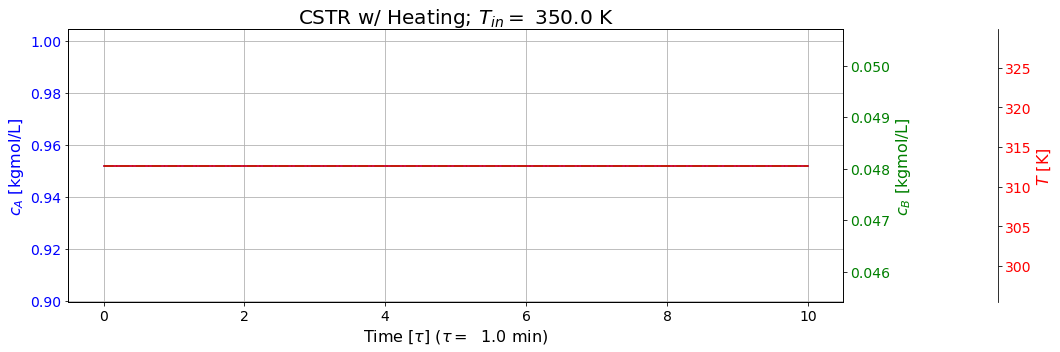

### <font color="blue">[1.5)](#toa)(5 pts) "Perturb" the steady state of the reactor arbitrarily (say 0.8 times the values of the steady state) and evolve the reactor in time. Explain the reactor's behavior.</font><a id="a15"></a>

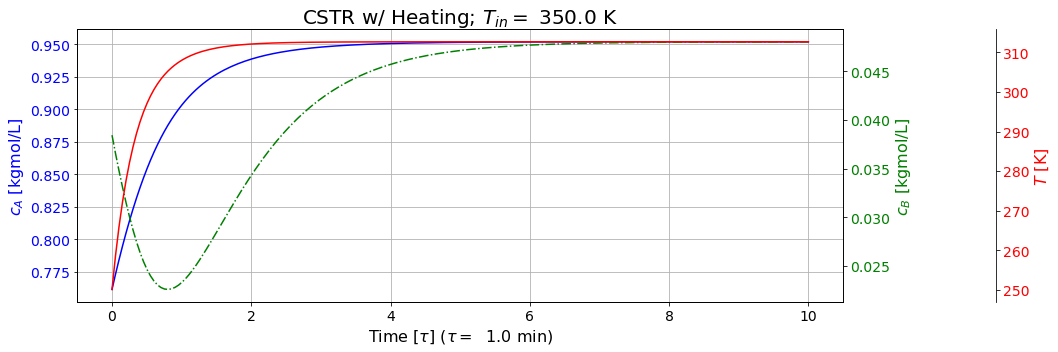

<font color="blue">**Explanation:**</font>

### <font color="blue">[1.6)](#toa)(5 pts) Compute the steady state when the temperature of the coolant is $T_c=304$ K.</font><a id="a16"></a>


c_a_ss = 1.45234e-01 kgmol/m^3
c_b_ss = 8.54766e-01 kgmol/m^3
temp_ss = 376.71 K


### <font color="blue">[1.7)](#toa)(5 pts) Is the steady state stable with respect to small perturbations? Explain.</font><a id="a17"></a>

lambda_vec =  [(-1+0j), (0.524+3.161j), (0.524-3.161j)] [1/min]


<font color="blue">**Explanation:**</font>

### <font color="blue">[1.8)](#toa)(5 pts) Provide the doubling period of the perturbation in units of the flow residence time. Explain your results.</font><a id="a18"></a>

T_d/tau = ln 2/lambda/tau =  1.322


<font color="blue">**Explanation:**</font>

### <font color="blue">[1.9)](#toa)(5 pts) Provide the oscilation period in units of flow residence time.</font><a id="a19"></a>

2pi/(lambda tau) =  1.988


### <font color="blue">[1.10)](#toa)(5 pts) Evolve the CSTR with initial conditions equal to a very small perturbation, say 0.99 times the steady state values, and show the time evolution. Explain the result obtained using the results of 1.7), 1.8), and 1.9).</font><a id="a110"></a>

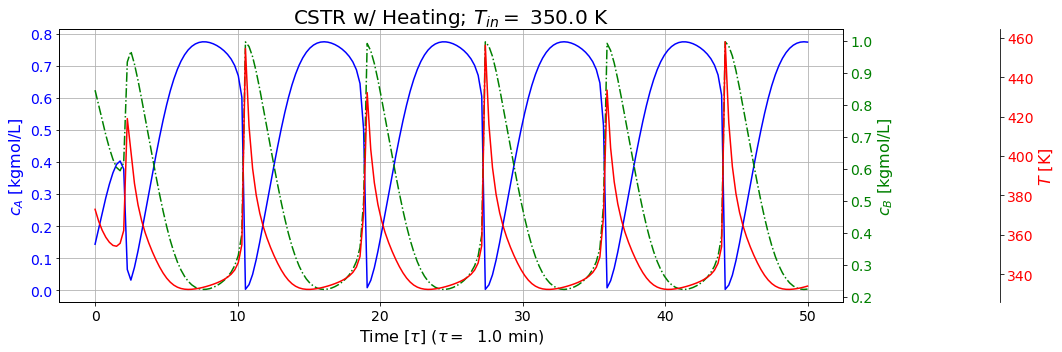

<font color="blue">**Explanation:**</font>

## [<font color="blue">Assignment 2 (50 pts)</font>](#toa)<a id="a2"></a>

### <font color="blue"> Consider the CSTR in [Labwork 07](https://nbviewer.org/github/dpploy/chen-3170/blob/master/notebooks/labwork-07.ipynb) with given data in the table below.</font>

## <font color="blue"> Input Data</font><a id="data"></a>

|Name                      | Parameter          | Value                | Unit              |
|:-------------------------|:------------------:|:--------------------:|:-----------------:| 
|mass flow rate            | $w$                | 10                   | kg/s              | 
|inflow concentration of A | $c_\text{Ain}$     | 1.5                  | kgmol/$\text{m}^3$| 
|inflow concentration of B | $c_\text{Bin}$     | 0.0                  | kgmol/$\text{m}^3$| 
|inflow concentration of C | $c_\text{Cin}$     | 0.0                  | kgmol/$\text{m}^3$| 
|inflow temperature        | $T_\text{in}$      | 425                  | K                 | 
|holdup volume             | $V$                | 0.2                  | $\text{m}^3$      | 
|mass density              | $\rho$             | 1000                 | kg/$\text{m}^3$   |
|heat capacity             | $C$                | 4184                 | J/(kg K)          |
|heat of reaction          | $\Delta H_{\text{R}_1}$| $6.69 \times 10^8$   | J/kgmol           |
|heat of reaction          | $\Delta H_{\text{R}_2}$| $-6.69 \times 10^7$   | J/kgmol           |
|Arrhenius frequency       | $k_{0_1}$          | $1.97\times 10^{24}$ | $\text{s}^{-1}$   |
|Arrhenius frequency       | $k_{0_2}$          | $1.97\times 10^{23}$ | $\text{s}^{-1}$   |
|activation temperature    | $E/R$              | 20000                | K                 |
|reaction order            | $\alpha$           | 1.13                 |                   |
|reverse reaction order    | $\beta$            | 0.48                 |                   |
|reverse reaction order    | $\gamma$           | 1.12                 |                   |
|S.S. reactor temperature  | $T_\text{ss}$      | 350                  | K                 |

In [35]:
'''Parameters dictionary'''
import numpy as np

params = dict()

params['w_flow']           =   10.0      # kg/s
params['c_a_in']           =   1.5       # kgmol/m^3
params['c_b_in']           =   0.0       # kgmol/m^3
params['c_c_in']           =   0.0       # kgmol/m^3
params['temp_in']          =   425.0     # K
params['volume']           =   0.2       # m^3
params['rho']              =   1000.0    # kg/m^3
params['heat_capacity']    =   4184.0    # J/kg/K
params['enthalpy_rxn_vec'] =  np.array([6.69e8, -6.69e7]) # J/kgmol
params['k_0_vec']          =  np.array([1.97e24, 1.97e23])
params['energy_a_over_r']  =   20000.0  # K
params['alpha']            =   1.13
params['beta']             =   0.48
params['gamma']            =   1.12

### <font color="blue">[2.1)](#toa)(5 pts) Compute the steady state when the external heating power is $\dot{Q}=5.5$ MW.</font><a id="a21"></a>


c_a_ss = 0.05867 kgmol/m^3
c_b_ss = 2.39517 kgmol/m^3
c_c_ss = 0.50658 kgmol/m^3
temp_ss = 360.28862 K


### <font color="blue">[2.2)](#toa)(5 pts) Is the steady state stable with respect to small perturbations? Explain.</font><a id="a22"></a>

lambda =  [-0.05, -0.05, -0.051, -2.947] [1/s]


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.3)](#toa)(5 pts) Provide the principal relaxation times of the perturbations of the reactor measured in units of the flow residence time. Explain your results.</font><a id="a23"></a>

1/(lambda tau) = [1.0, 1.0, 0.973, 0.017]


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.4)](#toa)(5 pts) "Perturb" the steady state of the reactor arbitrarily (say 0.9 times the values of the steady state) and evolve the reactor in time. Explain the reactor's behavior.</font><a id="a24"></a>

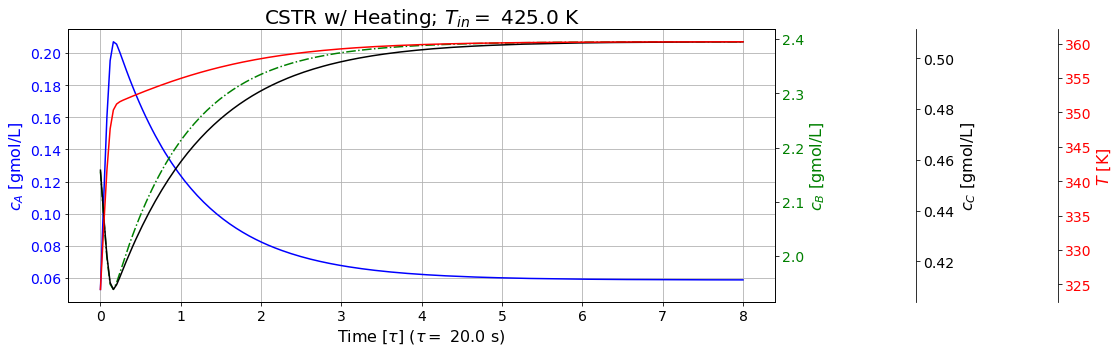

<font color="blue">**Explanation:**</font>

### <font color="blue">[2.5)](#toa)(10 pts) Mimic an accident scenario by running the reactor in steady state for 4 $\tau$ then abruptly remove heating for 3 $\tau$ and then return normal heating power and run the reactor for a total of 15 $\tau$. Show the dynamics in a plot as below and explain the impact on operation.</font><a id="a25"></a>

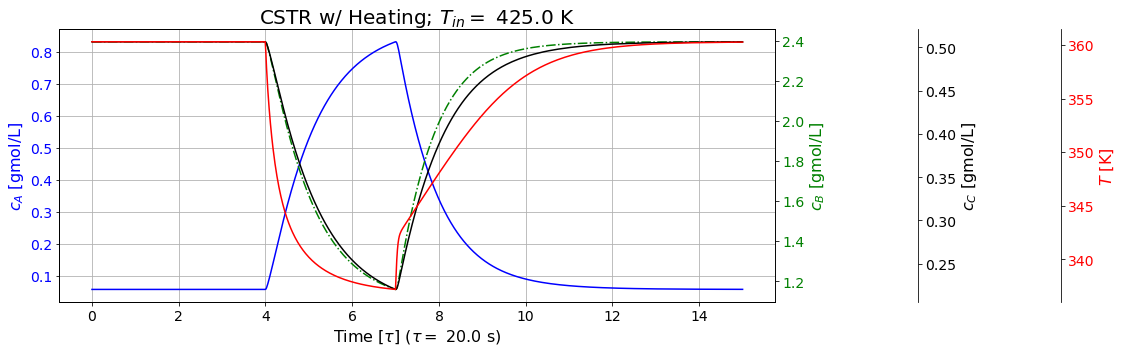

<font color="blue">**Explanation:**</font>

## [<font color="blue">Assignment 2 (Bonus 5 pts)</font>](#toa)<a id="a2"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>